In [25]:
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression

In [26]:
data = read_csv('./results/results.csv')
data['n+m'] = data['nbNodes'] + data['nbEdges']

In [27]:
data.sort_values(by=['n+m'])

,name,nbNodes,nbEdges,approxNbNodes,approxNbEdges,density,duration,n+m
1,test/test1.txt,10,9,10,9,0.90000,0.000015,19
3,test/test3.txt,9,14,9,14,1.55556,0.000017,23
0,test/graph.txt,10,16,5,10,2.00000,0.000024,26
2,test/test2.txt,20,31,20,31,1.55000,0.000030,51
8,data/as20000102_ri.txt,6474,13233,588,2557,4.34864,0.003142,19707
13,data/tvshow_edges_ri.txt,3892,17263,64,1958,30.59380,0.003545,21155
15,data/politician_edges_ri.txt,5908,41730,184,4267,23.19020,0.012197,47638
18,data/company_edges_ri.txt,14113,52311,97,1057,10.89690,0.019873,66424
14,data/public_figure_edges_ri.txt,11565,67115,281,9704,34.53380,0.021452,78680
17,data/government_edges_ri.txt,7057,89456,242,8830,36.48760,0.018154,96513


In [28]:
model = LinearRegression()
reg = model.fit(data [['n+m']],data['duration'])
reg.coef_

array([4.42197785e-07])

R² =  0.994102786913073


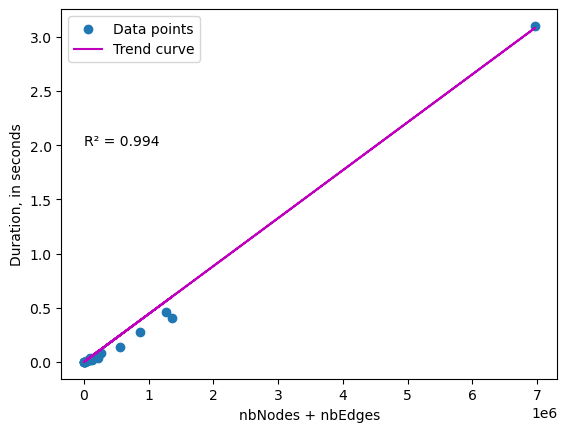

In [29]:
plt.scatter(data['n+m'],data['duration'],label="Data points")
data['prediction'] = data['n+m'].apply(lambda x: reg.coef_[0]*x)
plt.plot(data['n+m'], data['prediction'],label="Trend curve",color="m")
plt.xlabel("nbNodes + nbEdges")
plt.ylabel("Duration, in seconds")
plt.title("")
R = reg.score(data[['n+m']], data[['duration']])
print("R² = ", R)
plt.text(0,2,"R² = " + str(round(R,3)))
plt.legend()
plt.savefig("./results/n+m_large.png")

In [30]:
model3 = LinearRegression()
reg3 = model.fit(data [['nbEdges']],data['duration'])
reg3.coef_

array([4.56782816e-07])

R² =  0.9975555005560341


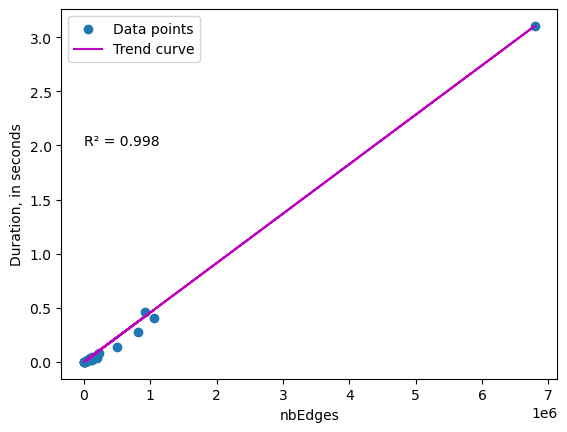

In [31]:
plt.scatter(data['nbEdges'],data['duration'],label="Data points")
data['prediction'] = data['nbEdges'].apply(lambda x: reg3.coef_[0]*x)
plt.plot(data['nbEdges'], data['prediction'],label="Trend curve",color="m")
plt.xlabel("nbEdges")
plt.ylabel("Duration, in seconds")
plt.title("")
R = reg3.score(data[['nbEdges']], data[['duration']])
print("R² = ", R)
plt.text(0,2,"R² = " + str(round(R,3)))
plt.legend()
plt.savefig("./results/m.png")

In [32]:
data.drop([12], axis=0, inplace=True)

In [33]:
model = LinearRegression()
reg0 = model.fit(data [['n+m']],data['duration'])
reg0.coef_

array([3.27267797e-07])

R² =  0.9806955869597458


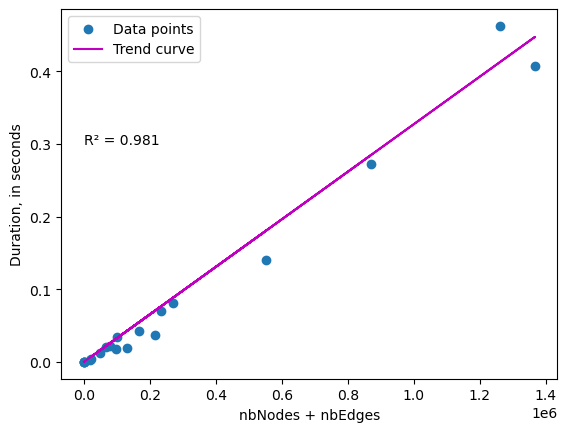

In [34]:
plt.scatter(data['n+m'],data['duration'],label="Data points")
data['prediction'] = data['n+m'].apply(lambda x: reg0.coef_[0]*x)
plt.plot(data['n+m'], data['prediction'],label="Trend curve",color="m")
plt.xlabel("nbNodes + nbEdges")
plt.ylabel("Duration, in seconds")
plt.title("")
R = reg0.score(data[['n+m']], data[['duration']])
print("R² = ", R)
plt.text(0,0.3,"R² = " + str(round(R,3)))
plt.legend()
plt.savefig("./results/n+m.png")